In [1]:
import gdown
import shutil
from astrohack.panel import panel
from astrohack._utils._fits_io import _aips_holog_to_xds
import os
from dask.distributed import Client, LocalCluster

In [2]:
# Initialize local cluster
try:
    client = Client('http://127.0.0.1:8787')

except:
    cluster = LocalCluster(
        n_workers=4,
        threads_per_worker=1,
        memory_limit='16GB'
    )

    client = Client(cluster)

2023-02-09 08:18:21,426 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ps44s_yj', purging
2023-02-09 08:18:21,426 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-gh5mtsqb', purging
2023-02-09 08:18:21,427 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-7_7jb4u2', purging
2023-02-09 08:18:21,427 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_u9oju0r', purging


In [10]:
%%time
holog_image = 'hack_file'
panel_output = 'hack_file'
panel(holog_image, panel_output,
      aipsdata=False, 
      telescope=None, 
      save_mask=False, 
      save_phase=False, 
      unit='mm', cutoff=0.2)

CPU times: user 1.69 s, sys: 277 ms, total: 1.96 s
Wall time: 57.1 s


In [11]:
# Download VLA Holography with known panel deviations
datafolder = "./paneldata/"
os.makedirs(name=datafolder, exist_ok=True)
panelzip = datafolder+"panel.zip"
if not os.path.exists(panelzip):
    url = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
    gdown.download(url, panelzip)
shutil.unpack_archive(filename=panelzip, extract_dir=datafolder)

In [12]:
# Create input data set
holog_image = datafolder+'input.zarr'
input_data_xds = _aips_holog_to_xds(datafolder+'amp.fits', datafolder+'dev.fits')
input_data_xds.to_zarr(holog_image, mode='w')

CPU times: user 52 s, sys: 4.6 s, total: 56.6 s
Wall time: 50.5 s


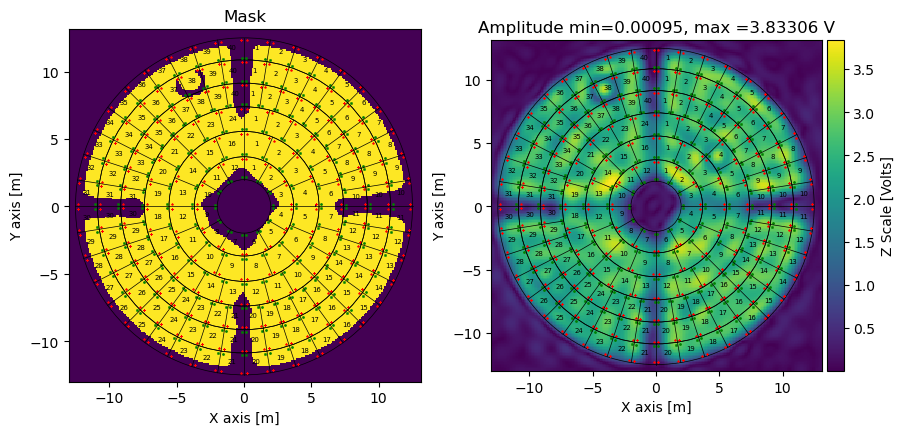

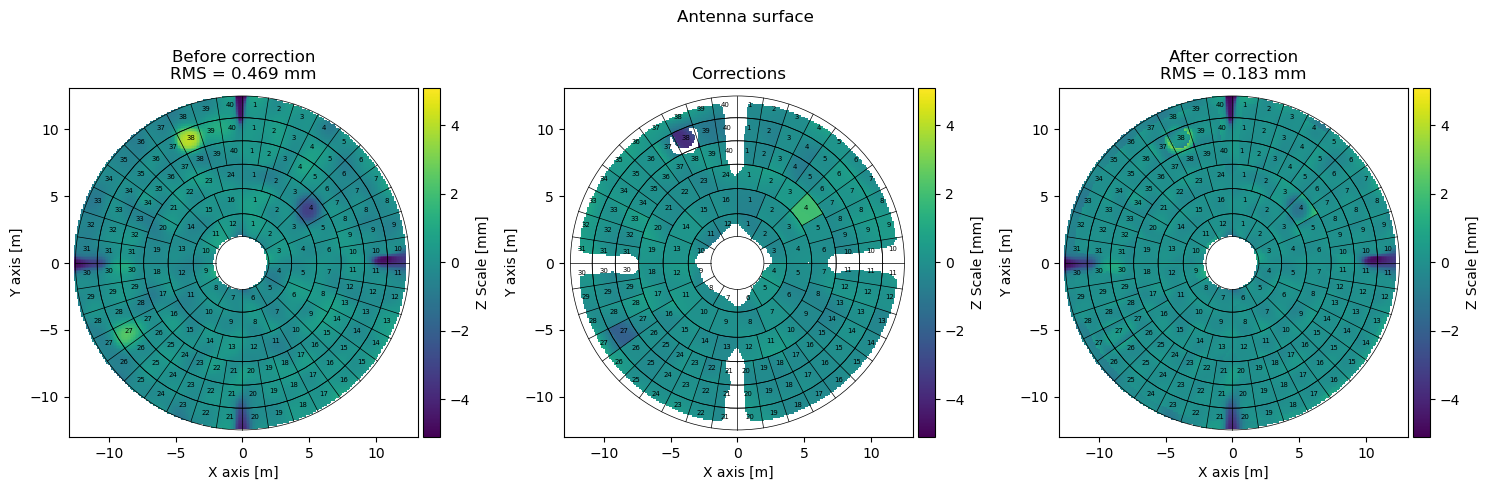

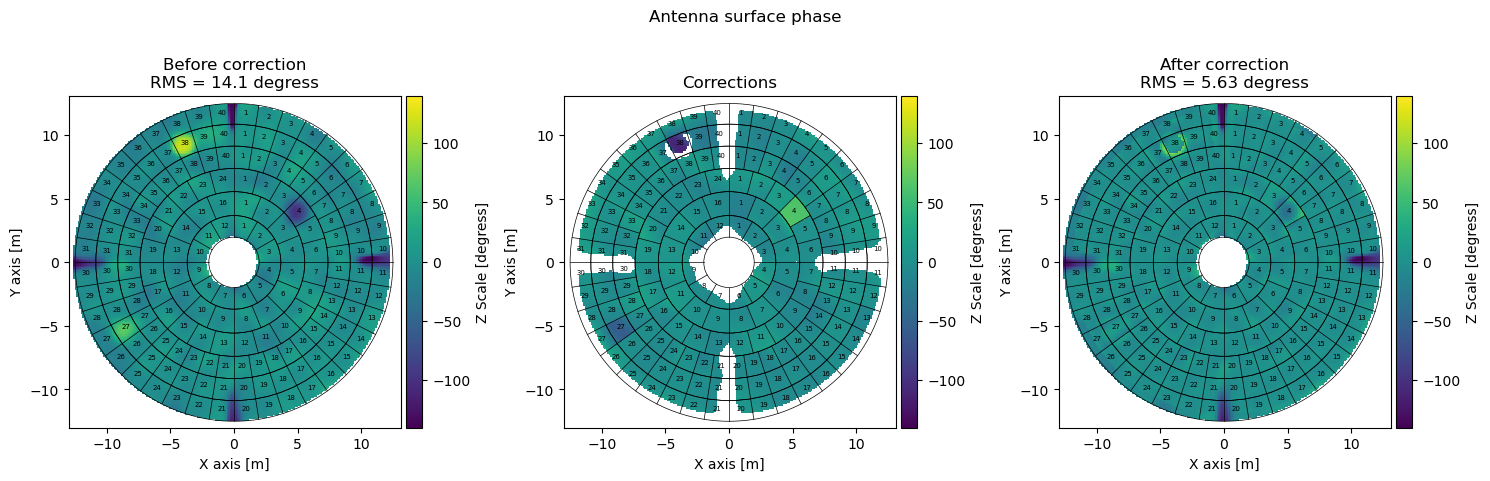

In [13]:
%%time
# Execute Panel chunk
panel(holog_image, 'vla_data',
      aipsdata=True, 
      telescope='vla', 
      basename='antenna25', 
      save_mask=True, 
      save_phase=True, 
      unit='miliinches', cutoff=0.4)

In [7]:
# Display report
